## DATA ACQUISITION

The Kaggle data is sourced from and consists of metadata from https://www.themoviedb.org/. 

In [18]:
import pandas as pd
import numpy as np 
import pandas_profiling as profile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
train_data = pd.read_csv('./data/train.csv')

In [20]:
train_data.shape

(3000, 23)

There appear to be 3000 different movie with 23 different metadata tags. 

In [21]:
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Additionally, the belongs_to_collection, genres, spoken_languages, keywords, cast, and crew metadata tags appear to be storing their information in dictionary form.  

I will separate the belongs_to_collection into the collection name and whether or not it contains a collection. 

In [5]:
train_data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

There appear to be null values in belongs_to_collection, homepage, poster_path, production_companies, production_countries, spoken_languages, tagline, keywords, cast, and crew. Thus, 10 out of my 23 columns have null values. 

## DATA CLEANING UPDATED

## DATA CLEANING

I believe that collections are an important factor in predicting whether or not a movie will do well. Thus, I will replace all of the null values in the collections column with 'No Collection'

In [6]:
train_data.belongs_to_collection.fillna('No Collection', inplace = True)

I do not believe that having a home page is an important factor in predicting whether or not a movie will do well. Thus, I will drop the homepage column, as roughly two-thirds of its values are null values. 

In [7]:
train_data.drop('homepage',axis=1,inplace=True)

Since there are only 7 movies with missing genres, I will drop those movies from my dataset. 

In [8]:
train_data.dropna(inplace=True)

Since there is only one movie with a missing poster path, I will drop that movie from my dataset. 

Since there are only 7 movies with missing overviews, I will drop those movies from my dataset. 

Since there are only 156 movies with missing production companies and 55 with missing production countries, I will drop those movies from my dataset. 

Since there are only 2 movies with missing runtimes, I will drop the movies from my dataset. 

Since there are only 20 movies with missing spoken languages, I will drop the movies from my dataset. 

Since there are 597 movies with missing taglines, I will impute their taglines as "No tagline"

In [9]:
train_data.tagline.fillna('No Tagline', inplace = True)

Since there are 276 movies with missing keywords, I will impute their taglines as "No Keywords"

In [10]:
train_data.Keywords.fillna('No Keywords', inplace = True)

Since there are only 13 movies with missing cast and 16 movies with missing crew, I will drop those movies from my dataset. 

train_data.shape

In [11]:
train_data.shape

(2229, 22)

In total, I have dropped 196 movies, or 6.5 percent of my original dataset, and one column. 

I will now examine the revenue column to find the distribution of the revenues. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A849F0F8D0>]],
      dtype=object)

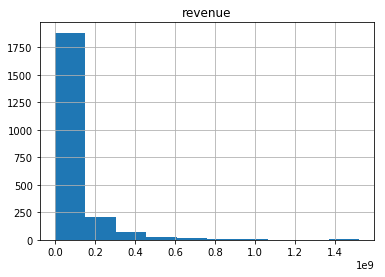

In [14]:
train_data.hist(column='revenue')

The distribution of movie revenue is extremely skewed to the right. 

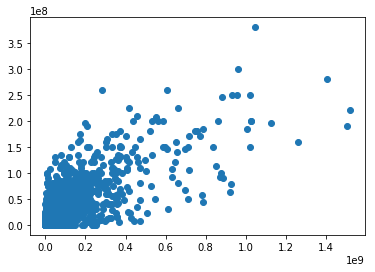

In [17]:
plt.scatter(train_data.revenue,train_data.budget)

There appears to be a weak positive correlation between the revenue and the budget of a movie. 